## Data augmentation 
    - We use operations like rotation, sheering, translation etc on data 

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Section 1
    - Write the network

In [3]:
from keras import Sequential
from keras import layers

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
model = Sequential()

In [5]:
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

### Section 2
    + Data 

In [8]:
import os

base_dir = "D:/Datasets/cats_and_dogs_small_1"

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')



In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')
validations_cats_dir = os.path.join(validation_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')
validations_dogs_dir = os.path.join(validation_dir, 'dogs')

In [10]:
# sanity checks - count number of files in each folder

print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

print(len(os.listdir(validations_cats_dir)))
print(len(os.listdir(validations_dogs_dir)))

2000
2000
1000
1000
1000
1000


### Section 3
    + Sample Data Preprocessing 

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
#train_datagen = ImageDataGenerator(rescale=1./255, 
#                                    rotation_range=40,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   fill_mode='nearest'
#                                  )

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#validation_datagen = ImageDataGenerator(rescale=1./255)

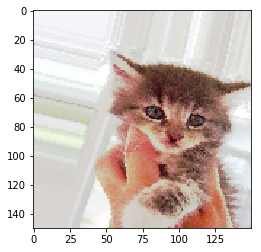

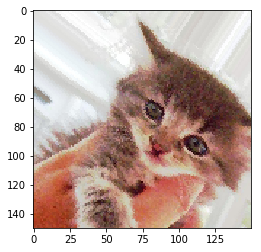

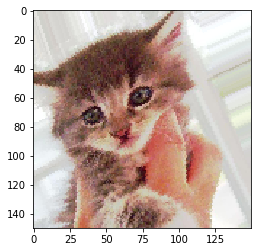

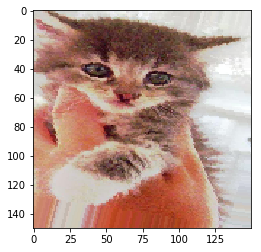

In [21]:
import matplotlib.pyplot as plt

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Section 4
    + Data Preprocessing 

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Section 5
    + Train the model 

In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10


c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


 3/10 [========>.....................] - ETA: 16s - loss: 0.5899 - acc: 0.7396

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5

10/10 [==============================] - 58s 6s/step - loss: 0.6091 - acc: 0.6781 - val_loss: 0.5919 - val_acc: 0.6831
Epoch 2/10
10/10 [==============================] - 58s 6s/step - loss: 0.5979 - acc: 0.6656 - val_loss: 0.5897 - val_acc: 0.6926
Epoch 3/10
10/10 [==============================] - 58s 6s/step - loss: 0.5728 - acc: 0.7281 - val_loss: 0.6572 - val_acc: 0.6149
Epoch 4/10
10/10 [==============================] - 55s 6s/step - loss: 0.6657 - acc: 0.6375 - val_loss: 0.6061 - val_acc: 0.6843
Epoch 5/10
10/10 [==============================] - 55s 6s/step - loss: 0.6365 - acc: 0.6094 - val_loss: 0.6218 - val_acc: 0.6394
Epoch 6/10
10/10 [==============================] - 58s 6s/step - loss: 0.6155 - acc: 0.6437 - val_loss: 0.6104 - val_acc: 0.6894
Epoch 7/10
10/10 [==============================] - 55s 6s/step - loss: 0.6127 - acc: 0.6750 - val_loss: 0.5855 - val_acc: 0.6806
Epoch 8/10
10/10 [==============================] - 56s 6s/step - loss: 0.6032 - acc: 0.6531 - val_lo

In [25]:
model.save('cats_and_dogs_small_2.h5')

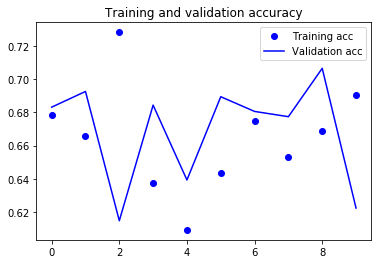

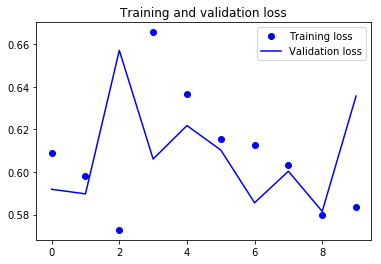

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
